In [1]:
## Communicating directly with the br-EFB via wireless
### 9/3/2018 CJH for LCToRFA

In [1]:
import brEFB_CJH as brefb
from importlib import reload
import time
import pandas as pd
import holoviews as hv
import matplotlib.pyplot as plt
import numpy as np

In [235]:
reload(brefb)

<module 'brEFB_CJH' from 'C:\\CJH\\LCTRFA\\float_git\\lcf_float\\python\\brEFB_CJH.py'>

In [4]:
brefb.set_banks()

Searching for banks...  found dmx 10 at ip 200...  found dmx 6 at ip 201... 
Set bank a to 201 and bank b to 200


In [17]:
confa = brefb.get_conf_df('a')
brefb.style_df(confa,'a')

,proportional_gain,integral_gain,derivative_gain,reversed,scaled_min,scaled_max
0,1.0,0.2,0,False,10,160
1,1.9,0.0,0,False,5,250
2,3.0,0.1,0,False,2,160
3,2.0,0.1,0,False,0,170


In [26]:
confb = brefb.get_conf_df('b')
brefb.style_df(confb,'b')

,proportional_gain,integral_gain,derivative_gain,reversed,scaled_min,scaled_max
0,1.2,0.0,0,False,29,166
1,1.2,0.1,0,False,20,245
2,2.0,0.1,0,False,32,230
3,3.0,0.0,0,False,18,244


In [7]:
shows = brefb.get_shows_df('a')
shows

,name,length,frame_rate,steppable,end_action
0,La Canada-Flintridge 2019,13050,30,Yes,Do Nothing


In [69]:
state_a = brefb.current_state_df('a')

,axis,transducer 01,transducer 256,setpoint 01,setpoint sp256
0,0,0.145,37,0.042,10
1,1,0.088,22,0.021,5
2,2,0.042,10,0.008,2
3,3,0.071,18,0.000,0


In [60]:
state_b = brefb.current_state_df('b')

,axis,transducer 01,transducer 256,setpoint 01,setpoint sp256
0,0,0.081,20,0.458,117
1,1,0.001,0,0.530,135
2,2,0.139,35,0.125,32
3,3,0.073,18,0.678,173


 Progress: [##########] 100.0%  0:▁▂▂▂▂▂▂▃ 1:▆▅▅▅▅▅▅▅ 2:▂▂▂▂▂▁▁▁ 3:▃▃▃▃▃▃▃▃ 

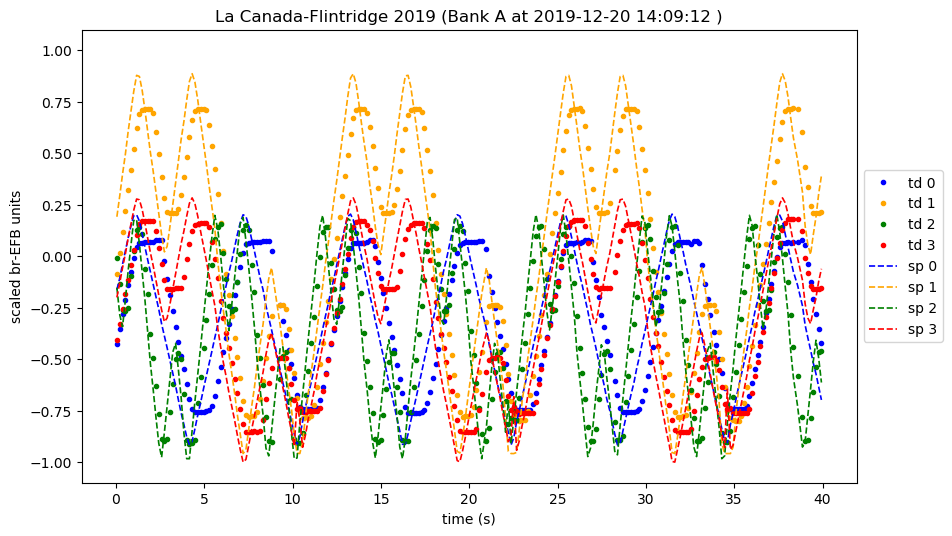

In [65]:
df_a, label_a = brefb.prepare_all_telemetry(end_time=40, dt=.1, axes=[0,1,2,3], bank='a')
brefb.create_matplot(df_a,label_a, bank='a')

 Progress: [##########] 100.0%  0:▆▆▆▆▅▅▅▅ 1:▇▇▇▆▆▆▆▅ 2:▆▆▆▆▆▆▆▆ 3:▃▃▃▃▃▂▂▂ 

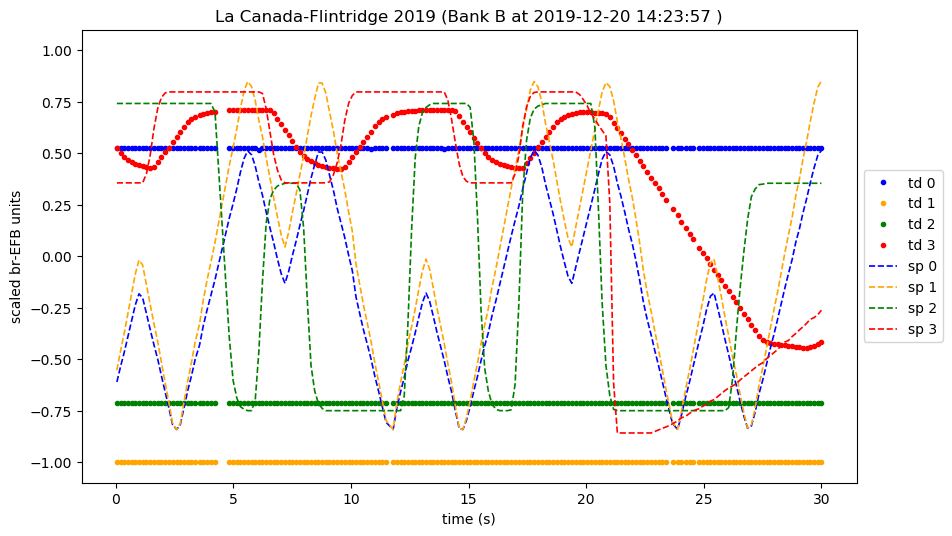

In [68]:
df_b, label_b = brefb.prepare_all_telemetry(end_time=30, dt=.1, axes=[0,1,2,3], bank='b')
brefb.create_matplot(df_b,label_b,save=False, bank='b')

In [96]:
brefb.create_matplot(df=df_b,label=label_b, axes=[0,1,2,3], save=True, fname='./pngs/LCF_BankB_AnimationTest_All_SPs_20191220.png')

In [ ]:
brefb.create_matplot(df=df_a,label=label_a.replace('Bank B', 'Bank A'), axes=[1,2], save=False, bank='a', fname='./pngs/LCF_BankA_AnimationTest_Guitars_20191220.png')

In [ ]:
brefb.create_matplot(df_a,label,save=True,fname='LCF_BankA_AnimationTest_20191128.png')

In [17]:
reload(brefb)
brefb.set_banks()

Searching for banks...  found dmx 10 at ip 200...  found dmx 6 at ip 201... 
Set bank a to 201 and bank b to 200


In [19]:
# -*- coding: utf-8 -*-
# Unicode: 9601, 9602, 9603, 9604, 9605, 9606, 9607, 9608
bar = '▁▂▃▄▅▆▇█'
bar = '▁▂▃▅▆▇'
barcount = len(bar)
 
def sparkline(numbers, autoscale=True):
    if autoscale:
        mn, mx = np.min(numbers), np.max(numbers)
    else:
        mn, mx = -1.0, 1.0
    extent = mx - mn
    sparkline = ''.join(bar[min([barcount - 1,int((n - mn) / extent * barcount)])] for n in numbers)
    return mn, mx, sparkline


In [22]:
max = 5
b= list((np.linspace(-1,1, 20))**2)
for i in range(max):
    #a=np.random.randint(10, size=10)
    #a=np.random.normal(1, 1, 10)
    a=np.cos(np.linspace(-np.pi-(3*i/max)*np.pi, np.pi-(3*i/max)*np.pi, 20))
    b.insert(0, b.pop())
    mn, mx, spark = sparkline(a)
    mn2, mx2, sparkb = sparkline(b)
    print(f'\r{spark}\t{sparkb}' ,end='',flush=True)
    time.sleep(0.1)

▃▂▁▁▁▁▁▂▃▅▆▇▇▇▇▇▆▆▅▃	▃▃▅▆▇▇▆▅▃▃▂▁▁▁▁▁▁▁▁▂

In [23]:
max = 30
for i in range(max):
    #a=np.random.randint(10, size=10)
    #a=np.random.normal(1, 1, 10)
    a=[np.sin(i),np.sin(np.pi/4+i),np.sin(np.pi/2+i),np.sin(3*np.pi/4+i)]
    mn, mx, spark = sparkline(a,autoscale=False)
    print("\r",spark,end="",flush=True)
    time.sleep(0.12)

 ▂▁▁▃

In [34]:
bank = 'b'
target = 'command'
result, url = brefb.get_url(bank, target)
print(f'Result: {result} and url: {url}')

Result: 0 and url: http://192.168.2.200/command.php


In [37]:
brefb.update_sparks()
text = "\nTD: " + brefb.sparkline(brefb.sparks['a'][::2],False) +"\nSP: "+brefb.sparkline(brefb.sparks['a'][1::2],False)
print(text)


TD: ▁▁▁▁
SP: ▁▁▁▁


In [104]:
df_a['t'].diff().describe()

count    250.000000
mean       0.159529
std        0.025249
min        0.150988
25%        0.153503
50%        0.154968
75%        0.158275
max        0.485974
Name: t, dtype: float64

In [158]:
axes=[0,3]
[brefb.legends['a'][index] for index in axes]

['captain', 'o_guitar']

In [233]:
def style_df(df, caption):
    return df.style.\
        set_caption(' - Bank ' + caption.upper() + ' -').\
        set_table_styles([dict(selector="caption", props=[("text-align", "left"),("font-size", "150%"), ("color", 'black')])]) 

In [237]:
brefb.style_df(confb,'b')

,proportional_gain,integral_gain,derivative_gain,reversed,scaled_min,scaled_max
0,1.2,0,0,False,29,166
1,1.2,0.1,0,False,20,245
2,2,0.1,0,False,32,230
3,3,0,0,False,18,244
